###Требования:

Оформить ноутбук с основными этапами:

подготовка данных
анализ
визуализация
обработка выбросов
обработка пропусков
генерация новых признаков
обучение модели
проверка качества модели
Предсказать цены для квартир из test.csv и выслать файл на проверку.

Что обязательно стоит попробовать:

Тщательный анализ данных
Поиск странных значений (ошибок, аномалий, выбросов)
Предобработка данных, но без фанатизма!
Проверка разных моделей
Подбор гиперпараметров лучшей модели
Отбор сильных признаков

###Требования :

ормить ноутбук с основными этапами:

одготовка данных
анализ
изуализация
обработка росов
обработка пропусков
енерация новых признаков
обучение модели
роверка ачества модели
редсказать ены артир из test.csv и выслать айл на проверку.

то обязательно стоит попробовать:

ательный анализ данных
Поиск странных значений (ошибок, аномалий, выбросов)
редобработка данных, но без фанатизма !
роверка разных моделей
одбор иперпараметров ей одели
тбор сильных признаков

# Введение

В данном разделе представлены все импортируемые модули, использованные при работе.

In [961]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
#from sklearn.experimental import enable_hist_gradient_boosting
#from sklearn.ensemble import HistGradientBoostingRegressor
from scipy.stats import boxcox

import warnings 
warnings.filterwarnings('ignore')

In [962]:
plt.style.use('seaborn-ticks')
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams.update({'font.size': 14})

In [963]:
df_train = pd.read_csv('C://Users//user//train.csv', index_col='Id')
df_test = pd.read_csv('C://Users//user//test.csv', index_col='Id')

## Используемые функции

In [964]:
#Функция для построения графиков зависимостей
def my_plot(df_table, x, y):
  with sns.axes_style(style='whitegrid'):
    grid = sns.jointplot(df_table[x], df_table[y], kind='reg')
  grid.fig.set_figwidth(10)
  grid.fig.set_figheight(6)

In [965]:
def result_of_teaching(train_pred, train_true, valid_pred, valid_true):
  print(f'Показатель R2 тренировочной выборки: {(r2_score(train_true, train_pred)):.3f}')
  print(f'Показатель R2 валидационной выборки: {(r2_score(valid_true, valid_pred)):.3f}')

  plt.figure(figsize=(16, 6))

  plt.subplot(1, 2, 1)
  sns.scatterplot(x=train_pred, y=train_true)
  plt.plot([0, 600000], [0, 600000], linestyle='--', color='red')
  plt.xlabel('Predicted values')
  plt.ylabel('True values')
  plt.title('Train: True vs Predicted values');  
  
  plt.subplot(1, 2, 2)
  sns.scatterplot(x=valid_pred, y=valid_true, color='green')
  plt.plot([0, 600000], [0, 600000], linestyle='--', color='black')
  plt.xlabel('Predicted values')
  plt.ylabel('True values')
  plt.title('Valid: True vs Predicted values');

In [966]:
def inspecting_ditribution_of_values(df, list_of_values):
  df[list_of_values].hist(grid=False, figsize=(20, 10), bins=40)

  print(df[list_of_values].agg(['skew']).transpose())

# Обработка тренировочного и тестового датасетов

In [967]:
df_train.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [968]:
df_test.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,
725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [969]:
#Создаем список id для тестовой выборки, чтобы потом добавить его в файл с предсказательной моделью
indexes_of_test = df_test.index
indexes_of_test

Int64Index([  725, 15856,  5480, 15664, 14275,  7633, 13329,  5502,  4220,
            11538,
            ...
            15706,  2105,  7220, 14562,  6836,  8180,  4695,  5783,  4780,
            12504],
           dtype='int64', name='Id', length=5000)

In [970]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     7887 non-null   float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  object 
 10  Ecology_3      10000 non-null  object 
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   5202 non-null   float64
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  object 
 18  Pri

In [971]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 725 to 12504
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     5000 non-null   int64  
 1   Rooms          5000 non-null   float64
 2   Square         5000 non-null   float64
 3   LifeSquare     3959 non-null   float64
 4   KitchenSquare  5000 non-null   float64
 5   Floor          5000 non-null   int64  
 6   HouseFloor     5000 non-null   float64
 7   HouseYear      5000 non-null   int64  
 8   Ecology_1      5000 non-null   float64
 9   Ecology_2      5000 non-null   object 
 10  Ecology_3      5000 non-null   object 
 11  Social_1       5000 non-null   int64  
 12  Social_2       5000 non-null   int64  
 13  Social_3       5000 non-null   int64  
 14  Healthcare_1   2623 non-null   float64
 15  Helthcare_2    5000 non-null   int64  
 16  Shops_1        5000 non-null   int64  
 17  Shops_2        5000 non-null   object 
dtypes: fl

В датасете присутсвуют пропуски в столбцах "LifeSquare" и "Healthcare_1", при этом количество пропущенных значений составляет более 20%, а значит просто удалить данные строки нельзя и требуется их обработать

In [972]:
df_train.isnull().sum()

DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [973]:
df_test.isnull().sum()

DistrictId          0
Rooms               0
Square              0
LifeSquare       1041
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     2377
Helthcare_2         0
Shops_1             0
Shops_2             0
dtype: int64

Из двух вышеобозначенных строк кода можно сделать вывод, что пропущенные строки заполненны Null, а не каким-то объектом.

In [974]:
#Выделение из основного датасета таблицы с Null для столбца LifeSquare
df_train_LSq_null = df_train[df_train['LifeSquare'].isnull()]
df_test_LSq_null = df_test[df_test['LifeSquare'].isnull()]

Для нахождения зависимостей в следующх двух строках запрашиваем статистические показатели общей таблицы и таблицы с пропусками LifeSquare

In [975]:
df_train.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [976]:
df_test.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


In [977]:
df_train_LSq_null.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,2113.000000,2113.000000,2113.000000,0.0,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,745.000000,2113.000000,2113.000000,2113.000000
mean,26.999527,1.778987,60.352646,NaN,1.383814,9.913393,13.248935,1981.707525,0.105183,10.528159,2569.010885,10.899195,733.229530,0.565547,3.111690,179534.185327
std,24.928012,0.764316,22.846588,NaN,2.725244,5.563304,8.091366,12.690541,0.113981,12.871756,3021.569733,35.099679,513.620168,1.117011,5.872527,75178.459104
min,0.000000,0.000000,17.414181,NaN,0.000000,1.000000,0.000000,1977.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,60502.583500
25%,6.000000,1.000000,43.624731,NaN,1.000000,5.000000,4.000000,1977.000000,0.007122,2.000000,469.000000,0.000000,540.000000,0.000000,0.000000,130409.470602
50%,23.000000,2.000000,58.634866,NaN,1.000000,9.000000,17.000000,1977.000000,0.072158,5.000000,1437.000000,0.000000,540.000000,0.000000,1.000000,167088.412963
75%,33.000000,2.000000,68.843287,NaN,1.000000,14.000000,17.000000,1977.000000,0.197368,22.000000,5212.000000,3.000000,1046.000000,0.000000,2.000000,205482.588565
max,190.000000,5.000000,604.705972,NaN,62.000000,27.000000,30.000000,2019.000000,0.437885,53.000000,14892.000000,141.000000,4702.000000,6.000000,23.000000,633233.466570


In [978]:
df_test_LSq_null.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,1041.000000,1041.000000,1041.000000,0.0,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,375.000000,1041.000000,1041.000000
mean,27.707973,1.801153,60.448508,NaN,1.480307,10.319885,13.254563,1982.261287,0.101632,10.938521,2659.760807,11.223823,749.757333,0.553314,3.217099
std,26.446994,0.753095,19.006856,NaN,3.107350,6.014444,8.308102,13.310238,0.111492,13.334890,3113.800952,35.633239,578.447680,1.093377,5.967777
min,1.000000,1.000000,26.719723,NaN,0.000000,1.000000,0.000000,1977.000000,0.000000,0.000000,168.000000,0.000000,30.000000,0.000000,0.000000
25%,6.000000,1.000000,44.431455,NaN,1.000000,5.000000,3.000000,1977.000000,0.007122,1.000000,388.000000,0.000000,540.000000,0.000000,0.000000
50%,23.000000,2.000000,60.072328,NaN,1.000000,9.000000,17.000000,1977.000000,0.072158,5.000000,1437.000000,1.000000,540.000000,0.000000,1.000000
75%,33.000000,2.000000,69.877653,NaN,1.000000,15.000000,17.000000,1977.000000,0.195781,22.000000,5212.000000,3.000000,1046.000000,0.000000,3.000000
max,169.000000,6.000000,163.325901,NaN,61.000000,28.000000,31.000000,2020.000000,0.437885,53.000000,13670.000000,141.000000,4129.000000,6.000000,23.000000


Из двух таблиц выше видно, что максимальные значения в столбцах комнат и общей площади значительно больше 3 квартиля. Более того, существует квартира, в которой жилая площадь больше общей площади. Перед обработкой пропусков следует обработать данные значения.

 ## Обработка выбросов Rooms

<AxesSubplot:xlabel='Rooms'>

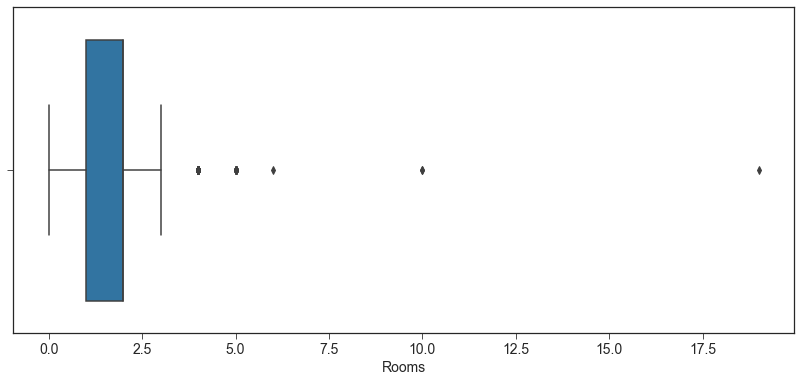

In [979]:
plt.figure(figsize=(14, 6))
sns.boxplot(df_train['Rooms'])

skew    1.433844
Name: Rooms, dtype: float64


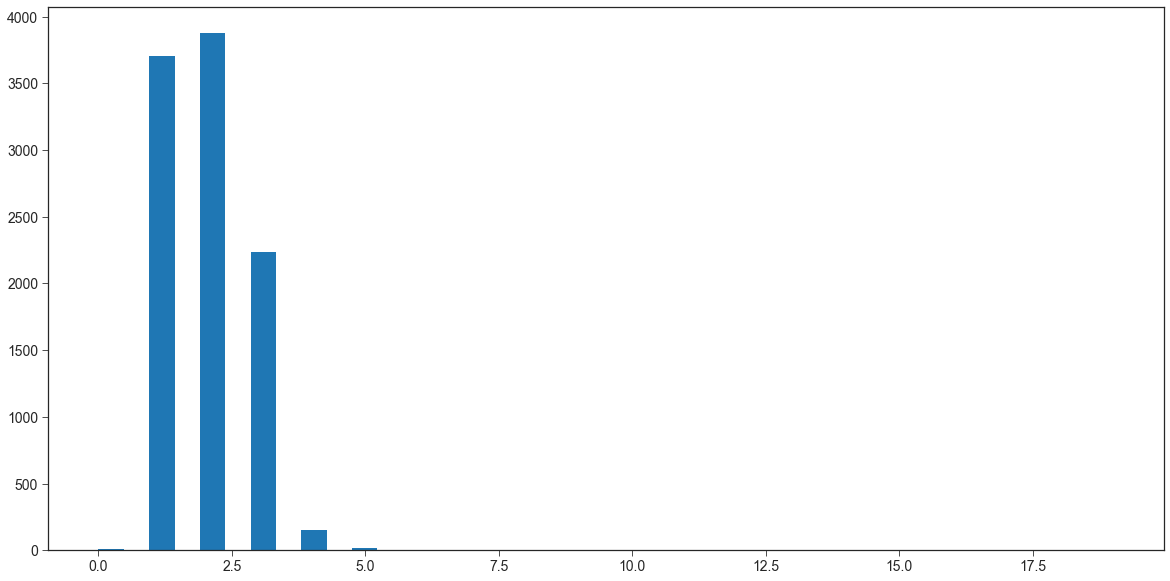

In [980]:
inspecting_ditribution_of_values(df_train, 'Rooms')

Вместо удаления выбросов с помощью логарифмизации создадим новый признак

skew    0.104427
Name: Rooms_log, dtype: float64


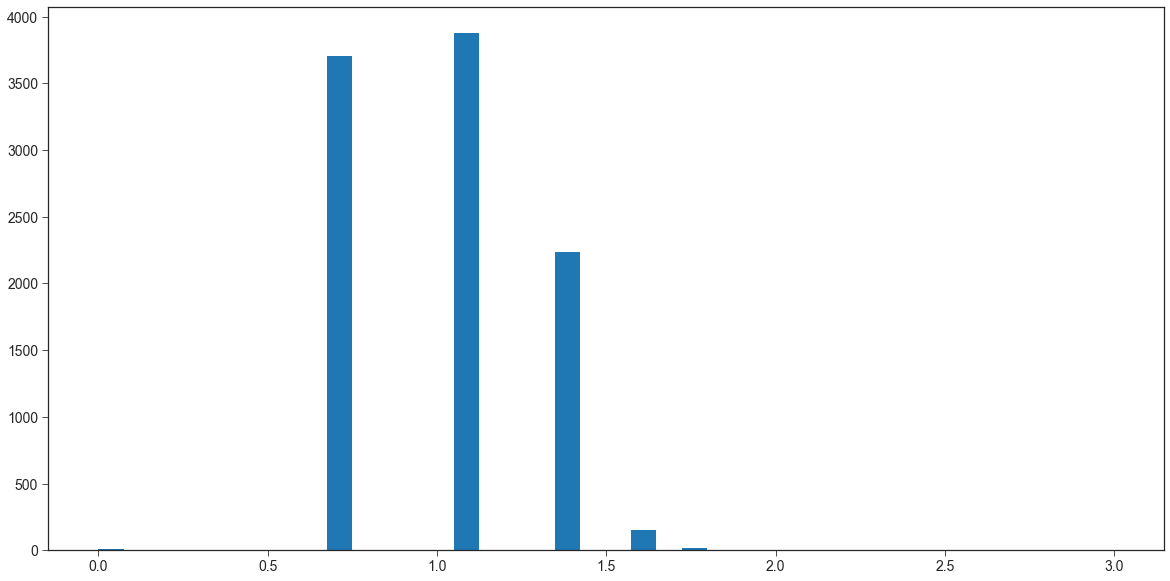

In [981]:
df_train['Rooms' + '_log'] = np.log1p(df_train['Rooms'])
inspecting_ditribution_of_values(df_train, 'Rooms_log')

<AxesSubplot:xlabel='Rooms'>

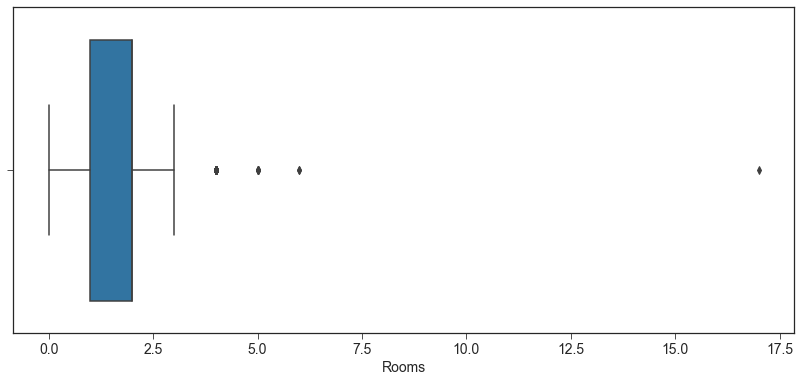

In [982]:
plt.figure(figsize=(14, 6))
sns.boxplot(df_test['Rooms'])

skew    0.096238
Name: Rooms_log, dtype: float64


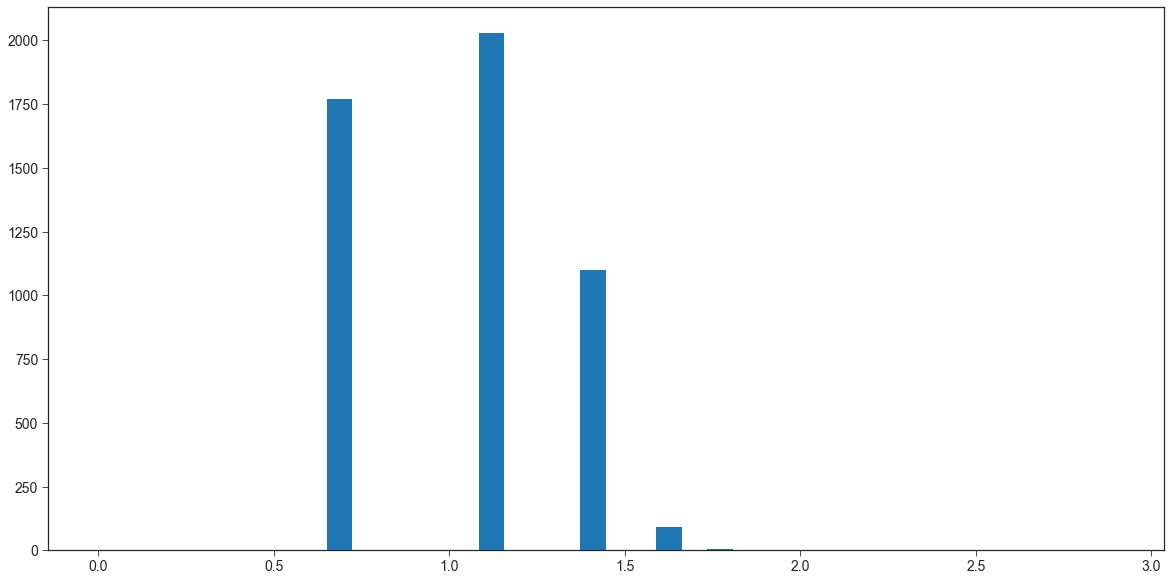

In [983]:
df_test['Rooms' + '_log'] = np.log1p(df_test['Rooms'])
inspecting_ditribution_of_values(df_test, 'Rooms_log')

Теперь распределение квартир подчиняется нормальному рапределению

## Анализ площади квартир

skew    5.519036
Name: Square, dtype: float64


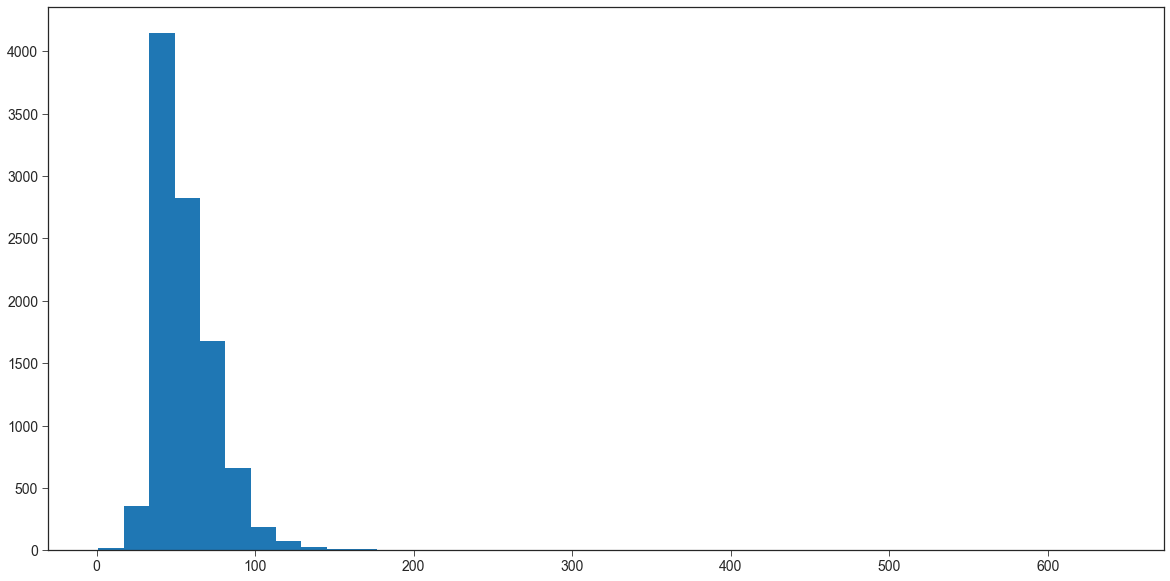

In [984]:
inspecting_ditribution_of_values(df_train, 'Square')

Выполним также логарифмизацию признаков

skew   -0.325922
Name: Square_log, dtype: float64


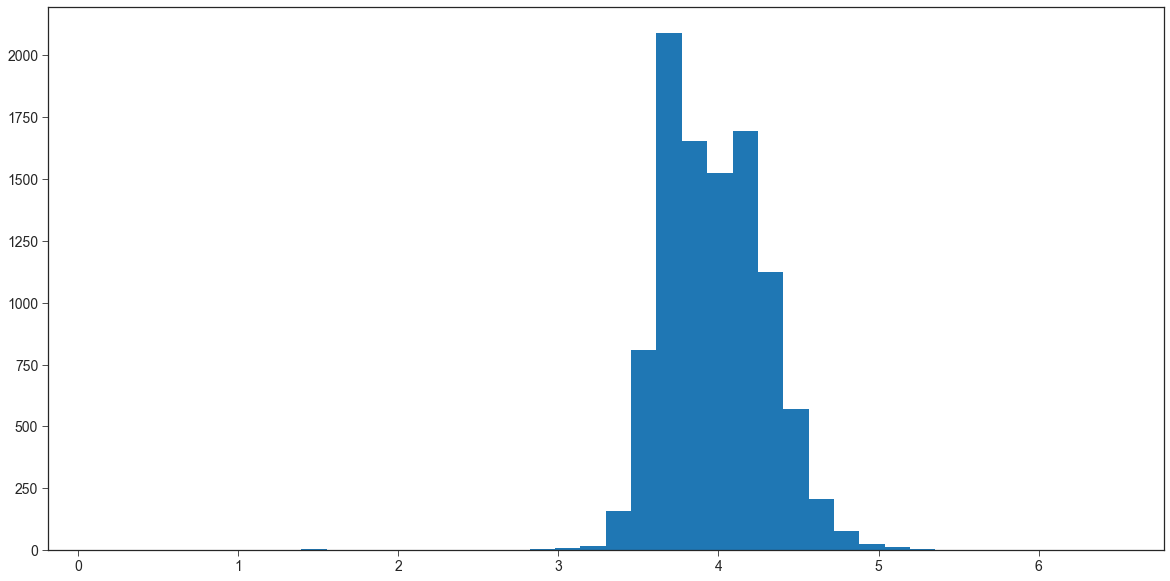

In [985]:
df_train['Square' + '_log'] = np.log(df_train['Square'])
inspecting_ditribution_of_values(df_train, 'Square_log')

Для тестовой выборки:

skew    1.380811
Name: Square, dtype: float64


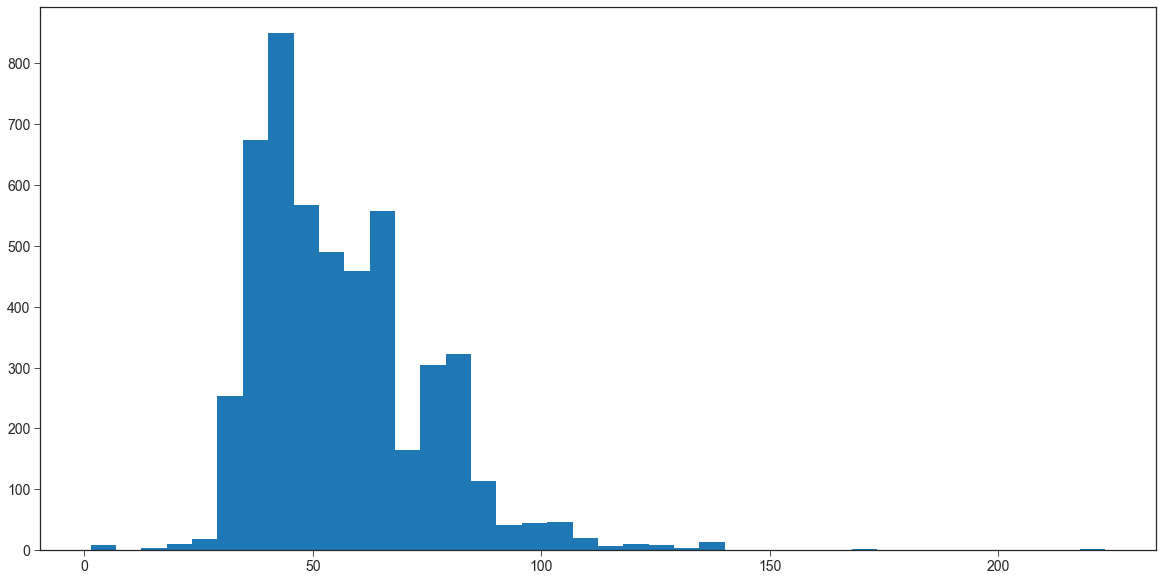

In [986]:
inspecting_ditribution_of_values(df_test, 'Square')

skew   -0.834779
Name: Square_log, dtype: float64


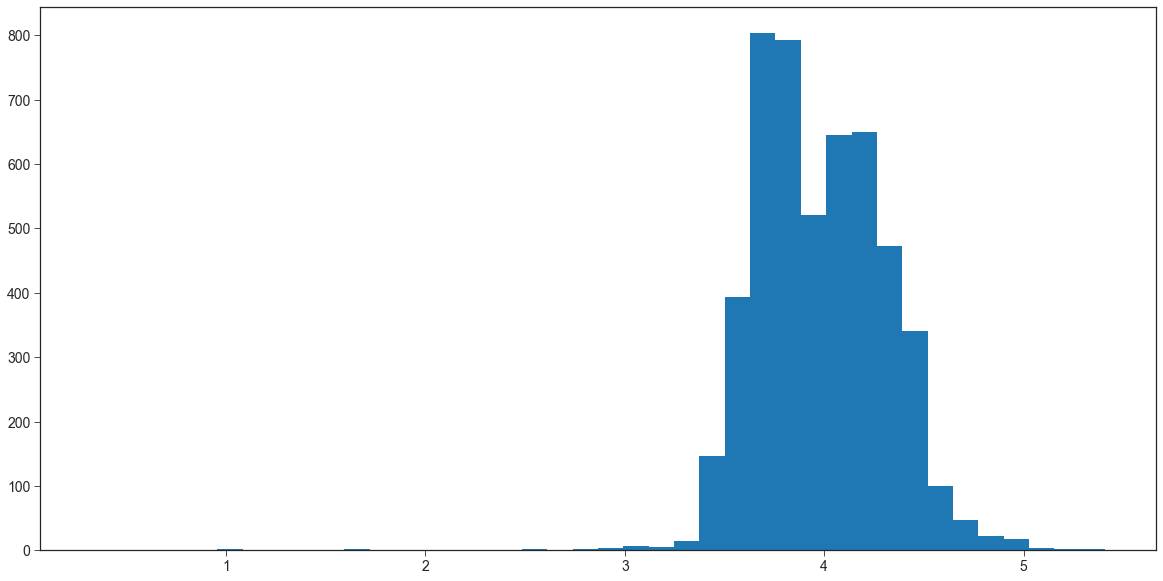

In [987]:
df_test['Square' + '_log'] = np.log(df_test['Square'])
inspecting_ditribution_of_values(df_test, 'Square_log')

Проверим случаи, когда жилая площадь меньше общай площади. Так как этого быть не может, то можно предположить, что в данном случае жилая и общая площади перепутаны местам.

### Cоздание нового признака на основе существующего

В качестве нового признака будет медианное значение площади квартиры в зависимости от количества комнат. Для начала создадим категориальный признак количества комнат на основе существующего количественного.

In [988]:
bins_rooms = [-0.01, 0, 1.01, 2.01, 3.01, 4.01, 5.01, 20]
label_rooms = ['0', '1', '2', '3', '4', '5', '>5']

df_train['Rooms_cat'] = pd.cut(df_train['Rooms'], bins = bins_rooms, labels = label_rooms)

df_train['Rooms_cat'].value_counts()

2     3880
1     3705
3     2235
4      150
5       18
0        8
>5       4
Name: Rooms_cat, dtype: int64

In [989]:
df_test['Rooms_cat'] = pd.cut(df_test['Rooms'], bins = bins_rooms, labels = label_rooms)

df_test['Rooms_cat'].value_counts()

2     2030
1     1769
3     1099
4       90
5        7
>5       3
0        2
Name: Rooms_cat, dtype: int64

Создаем медианное значение

In [990]:
group_sq_value_train = df_train.groupby('Rooms_cat')['Square'].median()
group_sq_value_train

Rooms_cat
0      65.487474
1      40.406590
2      55.841812
3      77.413643
4      98.668054
5     116.084861
>5     59.235654
Name: Square, dtype: float64

In [991]:
group_sq_value_test = df_test.groupby('Rooms_cat')['Square'].median()
group_sq_value_test

Rooms_cat
0      96.584677
1      40.117689
2      55.828079
3      77.679279
4      95.144246
5     120.330727
>5    110.750226
Name: Square, dtype: float64

Добавляем новое значение в таблицу

In [992]:
df_train = df_train.merge(group_sq_value_train, on = 'Rooms_cat', how = 'left', suffixes=['', '_gr_sq'])
df_train.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Rooms_log,Square_log,Rooms_cat,Square_gr_sq
0,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,...,5,NaN,0,11,B,184966.930730,1.098612,3.870817,2,55.841812
1,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,...,1,240.0,1,16,B,300009.450063,1.386294,4.184850,3,77.413643
2,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,...,0,229.0,1,3,B,220925.908524,1.098612,3.805505,2,55.841812
3,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,...,3,1084.0,0,5,B,175616.227217,1.098612,3.976930,2,55.841812
4,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,...,1,2078.0,2,4,B,150226.531644,0.693147,3.680071,1,40.406590


In [993]:
df_test = df_test.merge(group_sq_value_test, on = 'Rooms_cat', how = 'left', suffixes=['', '_gr_sq'])
df_test.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Rooms_log,Square_log,Rooms_cat,Square_gr_sq
0,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,...,2748,1,NaN,0,0,B,1.098612,3.909673,2,55.828079
1,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,...,1437,3,NaN,0,2,B,1.098612,4.237914,2,55.828079
2,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,...,7538,87,4702.0,5,5,B,0.693147,2.609909,1,40.117689
3,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,...,4583,3,NaN,3,3,B,1.098612,4.291098,2,55.828079
4,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,...,629,1,NaN,0,0,A,0.693147,3.861300,1,40.117689


Удаляем категориальные признаки

In [994]:
df_test.drop('Rooms_cat', axis = 1, inplace=True)

In [995]:
df_train.drop('Rooms_cat', axis = 1, inplace=True)

### Поиск зависимости жилой площади от общей

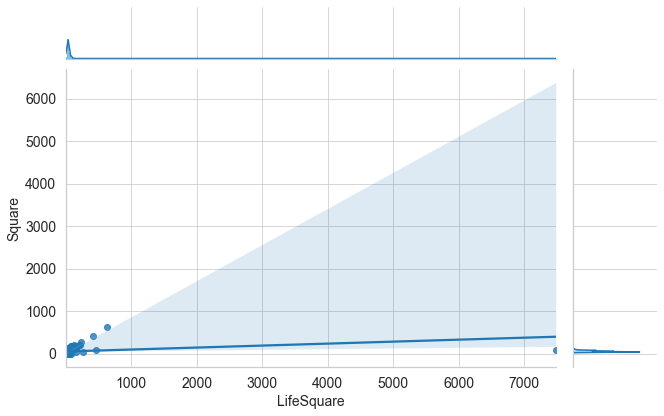

In [996]:
my_plot(df_train, 'LifeSquare', 'Square')

Для тестовой выборки

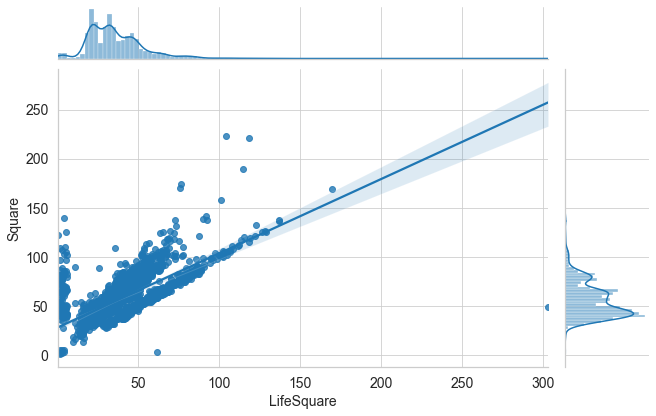

In [997]:
my_plot(df_test, 'LifeSquare', 'Square')

In [998]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     7887 non-null   float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  object 
 10  Ecology_3      10000 non-null  object 
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   5202 non-null   float64
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  object 
 18  Price  

Исходя из графиков выше можно сделать вывод, что жилая площадь квартир прямопропорциональна общей площади. Однако, имеется большой всплеск в начале графика. Несмотря на это, попробуем с помощью модели линейной регрессии заполнить прпоущенные значения.

Очевидно, что заполнить жилую площадь квартиры медианой или какой-либо другой константой некорректно ввиду того, что в выборке с пропусками прусутствуют квартиры разной площадью с разным числом квартир, поэтому, для заполнения данного столбца воспользуемся моделью линейной регрессии, т.к. очевидно, что жилая площадь линейно зависит от общей площади квартиры.

## Обработка пропусков LifeSquare

Для обучения модели из тренировочного датасета выделим отдельный датасет с полностью заполенными строками в столбце LifeSquare. Для обучения понадобятся только столбцы Rooms и Square, т.к. остальные параметры не влияют на жилую площадь.

In [999]:
df_train_for_LSq = df_train[df_train['LifeSquare'].notnull()]
df_train_for_LSq = df_train_for_LSq[['Rooms', 'Square', 'LifeSquare']]

In [1000]:
df_test_for_LSq = df_test[df_test['LifeSquare'].notnull()]
df_test_for_LSq = df_test_for_LSq[['Rooms', 'Square', 'LifeSquare']]

In [1001]:
df_train_for_LSq.describe()

,Rooms,Square,LifeSquare
count,7887.000000,7887.000000,7887.000000
mean,1.920375,55.234260,37.199645
std,0.856121,20.419782,86.241209
min,0.000000,1.136859,0.370619
25%,1.000000,41.170089,22.769832
50%,2.000000,50.872647,32.781260
75%,3.000000,64.704314,45.128803
max,19.000000,641.065193,7480.592129


In [1002]:
df_test_for_LSq.describe()

,Rooms,Square,LifeSquare
count,3959.000000,3959.000000,3959.000000
mean,1.938621,55.397981,36.158810
std,0.857462,18.978272,17.825287
min,0.000000,1.378543,0.333490
25%,1.000000,41.381489,23.092026
50%,2.000000,50.975474,32.925087
75%,3.000000,65.434355,45.174091
max,17.000000,223.453689,303.071094


### Заполение пропусков в тренировочном датасете

In [1003]:
#Создание тренировочной и тестовой выборок
X_train, X_test, y_train, y_test = train_test_split(df_train_for_LSq[['Rooms', 'Square']], df_train_for_LSq['LifeSquare'], test_size = 0.2, random_state = 42)

In [1004]:
#Создание и обучение модели
lr = LinearRegression()

In [1005]:
lr.fit(X_train, y_train)

LinearRegression()

In [1006]:
y_pred = lr.predict(X_test)

In [1007]:
r2_score(y_test, y_pred)

0.5831347722678851

Показатель невысокий, но приемлем в нашем случае, т.к. ошибка при этом будет меньше, по сравнению с заполнением покзаателя константой.

In [1008]:
#Создаем выборку из незаполненных значений
L_Sq_nan = df_train.loc[df_train['LifeSquare'].isna(), ['Rooms', 'Square']]
L_Sq_nan.shape

(2113, 2)

In [1009]:
#С помощью обученной модели заполеним пропуски
L_Sq_pred = lr.predict(L_Sq_nan)

In [1010]:
#Заполняем полученные значения в основном датасете
df_train.loc[df_train['LifeSquare'].isna(), ['LifeSquare']] = L_Sq_pred

In [1011]:
#Проверим есть ли пропуски
df_train['LifeSquare'].isna().sum()

0

In [1012]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     10000 non-null  float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  object 
 10  Ecology_3      10000 non-null  object 
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   5202 non-null   float64
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  object 
 18  Price  

### Заполнение пропусков в тестовом датасете

In [1013]:
#Создаем выборку из незаполненных значений
L_Sq_nan = df_test.loc[df_test['LifeSquare'].isna(), ['Rooms', 'Square']]
L_Sq_nan.shape

(1041, 2)

In [1014]:
#С помощью обученной модели заполеним пропуски
L_Sq_pred = lr.predict(L_Sq_nan)

In [1015]:
#Заполняем полученные значения в основном датасете
df_test.loc[df_test['LifeSquare'].isna(), ['LifeSquare']] = L_Sq_pred

In [1016]:
#Проверим есть ли пропуски
df_test['LifeSquare'].isna().sum()

0

In [1017]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     5000 non-null   int64  
 1   Rooms          5000 non-null   float64
 2   Square         5000 non-null   float64
 3   LifeSquare     5000 non-null   float64
 4   KitchenSquare  5000 non-null   float64
 5   Floor          5000 non-null   int64  
 6   HouseFloor     5000 non-null   float64
 7   HouseYear      5000 non-null   int64  
 8   Ecology_1      5000 non-null   float64
 9   Ecology_2      5000 non-null   object 
 10  Ecology_3      5000 non-null   object 
 11  Social_1       5000 non-null   int64  
 12  Social_2       5000 non-null   int64  
 13  Social_3       5000 non-null   int64  
 14  Healthcare_1   2623 non-null   float64
 15  Helthcare_2    5000 non-null   int64  
 16  Shops_1        5000 non-null   int64  
 17  Shops_2        5000 non-null   object 
 18  Rooms_lo

## Обработка пропусков Healthcare_1

В ходе работы определено, что зависимость между столбцами Healthcare_1 и Helthcare_2 отсутствует. На основании проведенной работы и отсутствия половины данных по данному признаку принимаем решение об удалении данного признака.

In [1018]:
df_train.drop('Healthcare_1', axis = 1, inplace=True)
df_train.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,Rooms_log,Square_log,Square_gr_sq
0,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,...,33,7976,5,0,11,B,184966.930730,1.098612,3.870817,55.841812
1,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,...,46,10309,1,1,16,B,300009.450063,1.386294,4.184850,77.413643
2,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,...,34,7759,0,1,3,B,220925.908524,1.098612,3.805505,55.841812
3,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,...,23,5735,3,0,5,B,175616.227217,1.098612,3.976930,55.841812
4,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,...,35,5776,1,2,4,B,150226.531644,0.693147,3.680071,40.406590


Также удаляем этот столбец из тестового датасета

In [1019]:
df_test.drop('Healthcare_1', axis = 1, inplace=True)
df_test.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Rooms_log,Square_log,Square_gr_sq
0,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,0,0,B,1.098612,3.909673,55.828079
1,74,2.0,69.263183,49.356758,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,0,2,B,1.098612,4.237914,55.828079
2,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,5,5,B,0.693147,2.609909,40.117689
3,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,3,3,B,1.098612,4.291098,55.828079
4,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,0,0,A,0.693147,3.861300,40.117689


## Преобразование категориальных признаков в бинарные

In [1020]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     10000 non-null  float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  object 
 10  Ecology_3      10000 non-null  object 
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Helthcare_2    10000 non-null  int64  
 15  Shops_1        10000 non-null  int64  
 16  Shops_2        10000 non-null  object 
 17  Price          10000 non-null  float64
 18  Rooms_l

Нас интересуют стобцы Ecology_2, Ecology_3, Shops_2

### Тренировочный датасет

In [1021]:
ecology_2_pr = pd.get_dummies(df_train['Ecology_2'], prefix='Ecology_2', dtype='int64')
ecology_2_pr

,Ecology_2_A,Ecology_2_B
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
9995,0,1
9996,0,1
9997,0,1
9998,0,1


In [1022]:
ecology_3_pr = pd.get_dummies(df_train['Ecology_3'], prefix='Ecology_3', dtype='int64')
ecology_3_pr

,Ecology_3_A,Ecology_3_B
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
9995,0,1
9996,0,1
9997,0,1
9998,1,0


In [1023]:
shops_2_pr = pd.get_dummies(df_train['Shops_2'], prefix='Shops_2', dtype='int64')
shops_2_pr

,Shops_2_A,Shops_2_B
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
9995,0,1
9996,1,0
9997,1,0
9998,0,1


In [1024]:
df_train[ecology_2_pr.columns] = ecology_2_pr
df_train[ecology_3_pr.columns] = ecology_3_pr
df_train[shops_2_pr.columns] = shops_2_pr
df_train.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Price,Rooms_log,Square_log,Square_gr_sq,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,...,184966.930730,1.098612,3.870817,55.841812,0,1,0,1,0,1
1,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,...,300009.450063,1.386294,4.184850,77.413643,0,1,0,1,0,1
2,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,...,220925.908524,1.098612,3.805505,55.841812,0,1,0,1,0,1
3,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,...,175616.227217,1.098612,3.976930,55.841812,0,1,0,1,0,1
4,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,...,150226.531644,0.693147,3.680071,40.406590,0,1,0,1,0,1


### Тестовый датасет

In [1025]:
ecology_2_pr = pd.get_dummies(df_test['Ecology_2'], prefix='Ecology_2', dtype='int64')
ecology_2_pr

,Ecology_2_A,Ecology_2_B
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
4995,0,1
4996,0,1
4997,0,1
4998,0,1


In [1026]:
ecology_3_pr = pd.get_dummies(df_test['Ecology_3'], prefix='Ecology_3', dtype='int64')
ecology_3_pr

,Ecology_3_A,Ecology_3_B
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
4995,0,1
4996,0,1
4997,0,1
4998,0,1


In [1027]:
shops_2_pr = pd.get_dummies(df_test['Shops_2'], prefix='Shops_2', dtype='int64')
shops_2_pr

,Shops_2_A,Shops_2_B
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
4995,0,1
4996,0,1
4997,0,1
4998,1,0


In [1028]:
df_test[ecology_2_pr.columns] = ecology_2_pr
df_test[ecology_3_pr.columns] = ecology_3_pr
df_test[shops_2_pr.columns] = shops_2_pr
df_test.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Shops_2,Rooms_log,Square_log,Square_gr_sq,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,...,B,1.098612,3.909673,55.828079,0,1,0,1,0,1
1,74,2.0,69.263183,49.356758,1.0,6,1.0,1977,0.075779,B,...,B,1.098612,4.237914,55.828079,0,1,0,1,0,1
2,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,...,B,0.693147,2.609909,40.117689,0,1,0,1,0,1
3,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,...,B,1.098612,4.291098,55.828079,0,1,0,1,0,1
4,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,...,A,0.693147,3.861300,40.117689,0,1,0,1,1,0


# Построение модели

## Разбиение тренировочного датасета на тренировочную и валидационную выборки

In [1029]:
X = df_train.drop('Price', axis=1)
y = df_train['Price']
X.shape, y.shape

((10000, 26), (10000,))

In [1030]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.15, shuffle=True, random_state=42)

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(8500, 26) (8500,)
(1500, 26) (1500,)


## Анализ признаков на нормальное распределение

In [1031]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8500 entries, 8701 to 7270
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     8500 non-null   int64  
 1   Rooms          8500 non-null   float64
 2   Square         8500 non-null   float64
 3   LifeSquare     8500 non-null   float64
 4   KitchenSquare  8500 non-null   float64
 5   Floor          8500 non-null   int64  
 6   HouseFloor     8500 non-null   float64
 7   HouseYear      8500 non-null   int64  
 8   Ecology_1      8500 non-null   float64
 9   Ecology_2      8500 non-null   object 
 10  Ecology_3      8500 non-null   object 
 11  Social_1       8500 non-null   int64  
 12  Social_2       8500 non-null   int64  
 13  Social_3       8500 non-null   int64  
 14  Helthcare_2    8500 non-null   int64  
 15  Shops_1        8500 non-null   int64  
 16  Shops_2        8500 non-null   object 
 17  Rooms_log      8500 non-null   float64
 18  Squar

In [1032]:
feature_num_names = ['LifeSquare','KitchenSquare','HouseFloor','Ecology_1','Square_gr_sq']

                    skew
LifeSquare     84.843139
KitchenSquare  62.368394
HouseFloor      0.936276
Ecology_1       1.121352
Square_gr_sq    0.756055


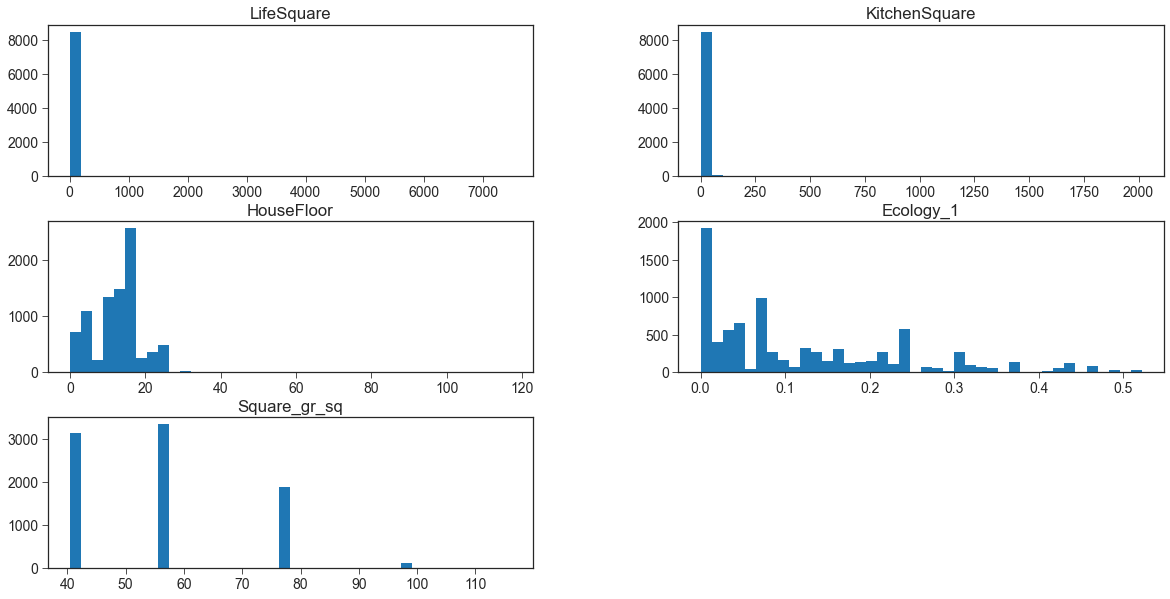

In [1033]:
inspecting_ditribution_of_values(X_train, feature_num_names)

В ходе опытных трансформаций определено следующее:
1. Для признака LifeSquare лучше всего подходит BoxCox-трансформация;
2. Для признака KitchenSquare лучше всего подходит log-трансформация;
3. Для Ecology_1,Square_gr_sq подходит трансформация с помощью взятия корня 3-ей степени.
4. Для HouseFloor подходит трансформация с помощью взятия корня 1.5-ей степени.

In [1034]:
X_train['LifeSquare' + '_boxcox'] = boxcox(X_train.loc[:, 'LifeSquare'])[0]
X_valid['LifeSquare' + '_boxcox'] = boxcox(X_valid.loc[:, 'LifeSquare'])[0]
df_test['LifeSquare' + '_boxcox'] = boxcox(df_test.loc[:, 'LifeSquare'])[0]

In [1035]:
X_train['KitchenSquare' + '_log'] = np.log1p(X_train['KitchenSquare'])
X_valid['KitchenSquare' + '_log'] = np.log1p(X_valid['KitchenSquare'])
df_test['KitchenSquare' + '_log'] = np.log1p(df_test['KitchenSquare'])

In [1036]:
X_train['HouseFloor' + '_sqrt1.5'] = np.lib.scimath.power(X_train['HouseFloor'], 1/1.5)
X_valid['HouseFloor' + '_sqrt1.5'] = np.lib.scimath.power(X_valid['HouseFloor'], 1/1.5)
df_test['HouseFloor' + '_sqrt1.5'] = np.lib.scimath.power(df_test['HouseFloor'], 1/1.5)

In [1037]:
feature_skewed_names = ['Ecology_1','Square_gr_sq']
feature_sqrt3_names = []
for f in feature_skewed_names:
    X_train[f + '_sqrt3'] = np.lib.scimath.power(X_train[f],  1/3)
    X_valid[f + '_sqrt3'] = np.lib.scimath.power(X_valid[f], 1/3)
    df_test[f + '_sqrt3'] = np.lib.scimath.power(df_test[f], 1/3)
    feature_sqrt3_names.append(f + '_sqrt3')

In [1038]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8500 entries, 8701 to 7270
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DistrictId          8500 non-null   int64  
 1   Rooms               8500 non-null   float64
 2   Square              8500 non-null   float64
 3   LifeSquare          8500 non-null   float64
 4   KitchenSquare       8500 non-null   float64
 5   Floor               8500 non-null   int64  
 6   HouseFloor          8500 non-null   float64
 7   HouseYear           8500 non-null   int64  
 8   Ecology_1           8500 non-null   float64
 9   Ecology_2           8500 non-null   object 
 10  Ecology_3           8500 non-null   object 
 11  Social_1            8500 non-null   int64  
 12  Social_2            8500 non-null   int64  
 13  Social_3            8500 non-null   int64  
 14  Helthcare_2         8500 non-null   int64  
 15  Shops_1             8500 non-null   int64  
 16  Sho

In [1039]:
feature_num_names = ['LifeSquare_boxcox','KitchenSquare_log','HouseFloor_sqrt1.5','Ecology_1_sqrt3','Square_gr_sq_sqrt3']

                        skew
LifeSquare_boxcox   0.587364
KitchenSquare_log  -0.499208
HouseFloor_sqrt1.5 -0.352719
Ecology_1_sqrt3    -0.337762
Square_gr_sq_sqrt3  0.478737


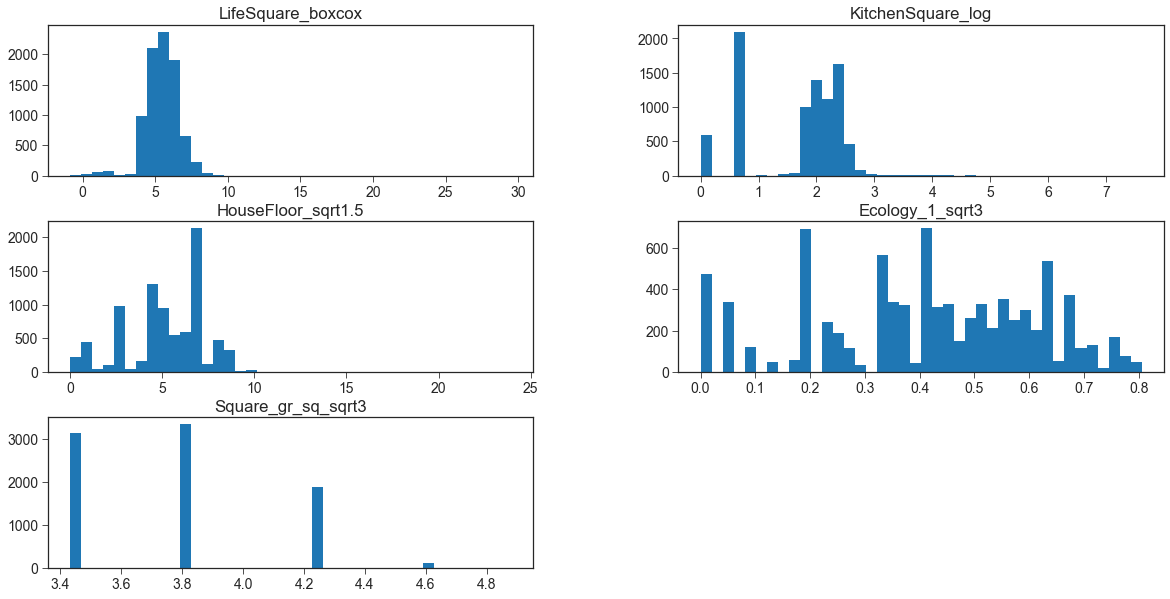

In [1040]:
inspecting_ditribution_of_values(X_train, feature_num_names)

## Стандартизация признаков

In [1041]:
scaler = StandardScaler()

In [1042]:
feature_num_names = X_train.select_dtypes(include='float64').columns.tolist()
feature_num_names

['Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'HouseFloor',
 'Ecology_1',
 'Rooms_log',
 'Square_log',
 'Square_gr_sq',
 'LifeSquare_boxcox',
 'KitchenSquare_log',
 'HouseFloor_sqrt1.5',
 'Ecology_1_sqrt3',
 'Square_gr_sq_sqrt3']

In [1043]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[feature_num_names]),
                              columns=feature_num_names, index=X_train.index)
X_valid_scaled = pd.DataFrame(scaler.transform(X_valid[feature_num_names]),
                             columns=feature_num_names, index=X_valid.index)
df_test_scaled = pd.DataFrame(scaler.transform(df_test[feature_num_names]),
                             columns=feature_num_names, index=df_test.index)

In [1044]:
X_train_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,8500.0,6.048593e-16,1.000059,-2.258302,-1.063656,0.130989,0.130989,20.439964
Square,8500.0,-1.131383e-16,1.000059,-2.714147,-0.714005,-0.180160,0.472353,26.985504
LifeSquare,8500.0,-3.526999e-17,1.000059,-0.456711,-0.167854,-0.055447,0.093464,89.649615
KitchenSquare,8500.0,-1.720062e-16,1.000059,-0.205686,-0.173347,-0.011650,0.085368,64.925898
HouseFloor,8500.0,1.037732e-16,1.000059,-1.849825,-0.528558,-0.088136,0.645901,15.326641
Ecology_1,8500.0,8.826926e-17,1.000059,-0.996770,-0.847810,-0.360115,0.655826,3.408330
Rooms_log,8500.0,3.763460e-16,1.000059,-3.628726,-1.166488,0.273829,0.273829,7.012889
Square_log,8500.0,-2.481623e-15,1.000059,-11.866628,-0.754721,-0.043082,0.649655,7.483696
Square_gr_sq,8500.0,-9.809322e-16,1.000059,-1.018396,-1.018396,0.010406,0.010406,4.025779
LifeSquare_boxcox,8500.0,8.921556e-16,1.000059,-5.505102,-0.642597,-0.033116,0.598875,20.864473


In [1045]:
X_valid_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,1500.0,0.001171,1.019314,-2.258302,-1.063656,0.130989,1.325635,9.688154
Square,1500.0,0.006838,1.221503,-2.672219,-0.721137,-0.232545,0.474151,28.774622
LifeSquare,1500.0,-0.008851,0.295064,-0.444257,-0.177794,-0.064427,0.095460,7.226103
KitchenSquare,1500.0,-0.018743,0.141162,-0.205686,-0.173347,-0.011650,0.085368,1.928715
HouseFloor,1500.0,0.008855,0.964496,-1.849825,-0.528558,0.205479,0.645901,5.196930
Ecology_1,1500.0,0.043408,1.030147,-0.996770,-0.832095,-0.357118,0.655826,3.408330
Rooms_log,1500.0,-0.006551,1.028875,-3.628726,-1.166488,0.273829,1.295750,4.889218
Square_log,1500.0,-0.020789,1.088572,-10.142204,-0.765435,-0.106080,0.651364,7.663708
Square_gr_sq,1500.0,0.008259,1.019170,-1.018396,-1.018396,0.010406,0.852046,4.025779
LifeSquare_boxcox,1500.0,0.493368,1.192583,-4.425298,-0.334243,0.405566,1.223573,11.029323


In [1046]:
df_test_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,5000.0,0.023471,1.001823,-2.258302,-1.063656,0.130989,0.130989,18.050673
Square,5000.0,0.007606,0.939493,-2.702255,-0.708021,-0.166003,0.491585,8.225333
LifeSquare,5000.0,-0.011230,0.212340,-0.457158,-0.169653,-0.053413,0.096075,3.189602
KitchenSquare,5000.0,-0.012400,0.321778,-0.205686,-0.173347,-0.011650,0.085368,19.844752
HouseFloor,5000.0,0.000095,0.996707,-1.849825,-0.528558,-0.088136,0.645901,12.684108
Ecology_1,5000.0,0.015091,1.013514,-0.996770,-0.832095,-0.387685,0.655826,3.408330
Rooms_log,5000.0,0.025888,0.993882,-3.628726,-1.166488,0.273829,0.273829,6.638622
Square_log,5000.0,0.007444,1.029868,-11.272356,-0.745762,-0.026277,0.667886,4.414459
Square_gr_sq,5000.0,0.015610,1.007391,-1.037652,-1.037652,0.009491,0.009491,4.308778
LifeSquare_boxcox,5000.0,3.553740,2.311432,-5.473935,1.866427,3.348672,4.962573,22.045273


In [1047]:
feature_bin_names = X_train.select_dtypes(include='int64').columns.tolist()
feature_bin_names

['DistrictId',
 'Floor',
 'HouseYear',
 'Social_1',
 'Social_2',
 'Social_3',
 'Helthcare_2',
 'Shops_1',
 'Ecology_2_A',
 'Ecology_2_B',
 'Ecology_3_A',
 'Ecology_3_B',
 'Shops_2_A',
 'Shops_2_B']

In [1048]:
X_train_scaled[feature_bin_names] = X_train[feature_bin_names]
X_valid_scaled[feature_bin_names] = X_valid[feature_bin_names]
df_test_scaled[feature_bin_names] = df_test[feature_bin_names]

In [1049]:
X_train_scaled.head()

,Rooms,Square,LifeSquare,KitchenSquare,HouseFloor,Ecology_1,Rooms_log,Square_log,Square_gr_sq,LifeSquare_boxcox,...,Social_2,Social_3,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
8701,1.325635,1.450893,0.154466,0.053029,-0.088136,-0.230331,1.295750,1.462767,1.448231,0.820131,...,19083,2,5,15,0,1,0,1,0,1
3429,-1.063656,-0.580575,-0.167055,0.053029,0.205479,1.621633,-1.166488,-0.560875,-1.018396,-0.637676,...,2748,1,0,0,0,1,0,1,0,1
8870,-1.063656,-1.105920,-0.149116,-0.043989,-0.528558,0.596761,-1.166488,-1.406705,-1.018396,-0.529745,...,6137,4,0,1,0,1,0,1,0,1
6962,0.130989,0.567779,0.118739,-0.173347,0.645901,2.699436,0.273829,0.739078,0.010406,0.692716,...,5735,3,0,5,0,1,0,1,0,1
2088,-1.063656,-1.325506,-0.082232,-0.173347,0.645901,-0.704236,-1.166488,-1.842964,-1.018396,-0.165236,...,168,0,0,0,0,1,0,1,0,1


In [1050]:
X_train.shape, X_train_scaled.shape

((8500, 31), (8500, 28))

## Обучение модели

### Линейная регрессия

Линейная регрессия показало достаточно низкий показатель R2:
1. Показатель R2 тренировочной выборки: 0.519
2. Показатель R2 валидационной выборки: 0.479

### RandomForest

1. Показатель R2 тренировочной выборки: 0.870
2. Показатель R2 валидационной выборки: 0.725

### GradientBoosting

In [1051]:
gbr = GradientBoostingRegressor(max_depth = 5, max_features = 12, random_state=42)

In [1052]:
gbr.fit(X_train_scaled, y_train)

GradientBoostingRegressor(max_depth=5, max_features=12, random_state=42)

In [1053]:
y_train_preds = gbr.predict(X_train_scaled)
y_valid_preds =  gbr.predict(X_valid_scaled)

Показатель R2 тренировочной выборки: 0.850
Показатель R2 валидационной выборки: 0.752


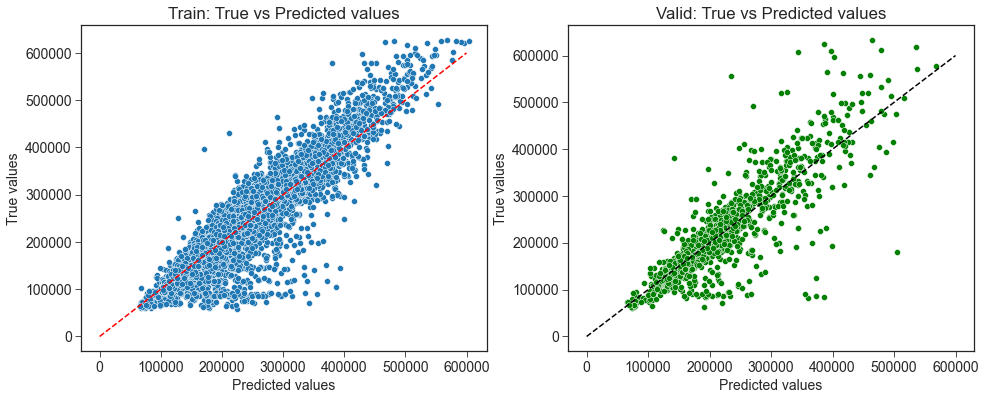

In [1054]:
result_of_teaching(y_train_preds, y_train, y_valid_preds, y_valid)

In [1055]:
feature_importances = pd.DataFrame(zip(*[X_train_scaled.columns], gbr.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False, inplace=True)
feature_importances

,feature_name,importance
7,Square_log,0.226571
1,Square,0.121279
18,Social_2,0.085279
0,Rooms,0.084766
17,Social_1,0.081648
19,Social_3,0.073619
14,DistrictId,0.051951
2,LifeSquare,0.037719
12,Ecology_1_sqrt3,0.031298
13,Square_gr_sq_sqrt3,0.028278


Удаление признаков ухудшило предсказательную модель, поэтому оставляем все признаки.


In [1056]:
y_pred_test = gbr.predict(df_test_scaled)

In [1057]:
df_test

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,LifeSquare_boxcox,KitchenSquare_log,HouseFloor_sqrt1.5,Ecology_1_sqrt3,Square_gr_sq_sqrt3
0,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,...,1,0,1,0,1,9.242152,1.945910,5.808786,0.676935,3.821943
1,74,2.0,69.263183,49.356758,1.0,6,1.0,1977,0.075779,B,...,1,0,1,0,1,11.591438,0.693147,1.000000,0.423171,3.821943
2,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,...,1,0,1,0,1,5.834080,2.564949,2.924018,0.000000,3.423303
3,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,...,1,0,1,0,1,11.933381,2.302585,7.851424,0.467038,3.821943
4,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,...,1,0,1,1,0,10.764444,0.693147,6.611489,0.416320,3.423303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,B,...,1,0,1,0,1,11.784818,1.945910,4.326749,0.055361,4.266795
4996,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,B,...,1,0,1,0,1,7.127287,2.397895,6.611489,0.192401,3.423303
4997,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,B,...,1,0,1,0,1,11.446592,2.302585,7.851424,0.449463,4.266795
4998,62,2.0,81.305222,59.590249,0.0,4,0.0,1977,0.072158,B,...,1,0,1,1,0,12.897133,0.000000,0.000000,0.416320,3.821943


In [1058]:
test_preds =  pd.DataFrame()
test_preds['Id'] = indexes_of_test
test_preds['Price'] = y_pred_test
test_preds.head()

,Id,Price
0,725,157687.903415
1,15856,212755.869131
2,5480,114452.777074
3,15664,378800.287580
4,14275,142616.642704


In [1059]:
test_preds.to_csv('D://Документы//Виталя//Программирование//GeekBrains  Data Science//Библиотеки Python для DS//Курсовая 1//VAKuznetsov_predictions_1401.csv', index=False, encoding='utf-8')

### HistGradientBoosting

1. Показатель R2 тренировочной выборки: 0.852
2. Показатель R2 валидационной выборки: 0.741